In [3]:
#2a
import pandas as pd
f = pd.DataFrame({'Weather':['Sunny', 'Rainy', 'Sunny', 'Sunny'],
                'Wind':['Mild', 'Mild', 'High', 'Mild'],
                'Temp':['Moderate', 'Mild', 'Moderate', 'Mild'],
                'go':['Yes', 'No', 'Yes', 'Yes']})
print(f.columns)

from sklearn.naive_bayes import GaussianNB as g
from sklearn.preprocessing import LabelEncoder as le
from sklearn.model_selection import train_test_split as tt

l = le()
for i in f.columns:
    f[i] = l.fit_transform(f[i])
    x = f.iloc[:, :3]
    y = f.iloc[:, 3]

xtr, xte, ytr, yte = tt(x, y, test_size=0.3)
gg = g()
gg.fit(xtr, ytr)
y_pred = gg.predict(xte)

from sklearn.metrics import accuracy_score
print(accuracy_score(yte, y_pred))



Index(['Weather', 'Wind', 'Temp', 'go'], dtype='object')
0.5


[[64  4]
 [ 3 29]]


C:\Users\itadmin.SCASA1\AppData\Local\Temp\ipykernel_5788\1577921309.py:28: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],c = ListedColormap(('pink', 'green'))(i), label = j)


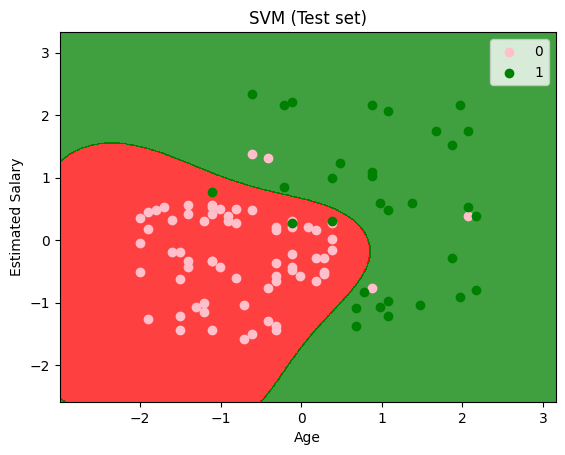

In [6]:
#2b
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
dataset = pd.read_csv("Social_Network_Ads.csv")
X = dataset.iloc[:, [2, 3]].values 
y = dataset.iloc[:, 4].values
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
from sklearn.svm import SVC
classifier = SVC(kernel='rbf', random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test,y_pred)
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],c = ListedColormap(('pink', 'green'))(i), label = j)
plt.title('SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()


[[ 0.28085796 -0.67204882]
 [ 1.35876151  0.40496103]
 [-0.81313372  0.20914106]
 [-0.43506306 -0.86786879]
 [-0.99010296 -0.47622884]
 [-0.57181202  0.40496103]
 [ 0.07171249  1.77570083]
 [-0.3546225  -0.57413883]
 [-0.99010296 -0.67204882]
 [-0.3546225  -0.28040887]]
Confusion Matrix : 
 [[62  3]
 [18 15]]
Accuracy :  0.7857142857142857


C:\Users\itadmin.SCASA1\AppData\Local\Temp\ipykernel_5788\2753843839.py:48: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


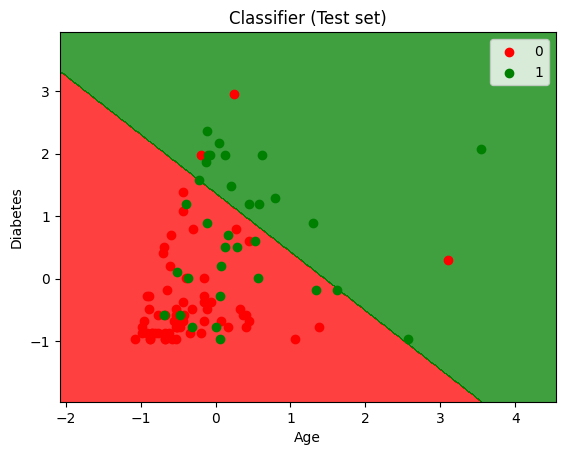

In [7]:
#2c
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap

dataset = pd.read_csv("diabetes.csv")

x = dataset.iloc[:, [4, 7]].values
y = dataset.iloc[:, 8].values

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.25, random_state = 0)

sc_x = StandardScaler()
xtrain = sc_x.fit_transform(xtrain)
xtest = sc_x.transform(xtest)

print (xtrain[0:10, :])

classifier = LogisticRegression(random_state = 0)
classifier.fit(xtrain, ytrain)
y_pred = classifier.predict(xtest)

cm = confusion_matrix(ytest, y_pred)

print ("Confusion Matrix : \n", cm)

print ("Accuracy : ", accuracy_score(ytest, y_pred))

X_set, y_set = xtest, ytest
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, 
          stop = X_set[:, 0].max() + 1, step = 0.01),
          np.arange(start = X_set[:, 1].min() - 1,
          stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, classifier.predict(
      np.array([X1.ravel(), X2.ravel()]).T).reshape(
      X1.shape), alpha = 0.75, cmap = ListedColormap(('red', 'green')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
        c = ListedColormap(('red', 'green'))(i), label = j)
  
plt.title('Classifier (Test set)')
plt.xlabel('Age')
plt.ylabel('Diabetes')
plt.legend()
plt.show()


Classification Accuracy: 81.48148148148148
[[37  5]
 [10 29]]


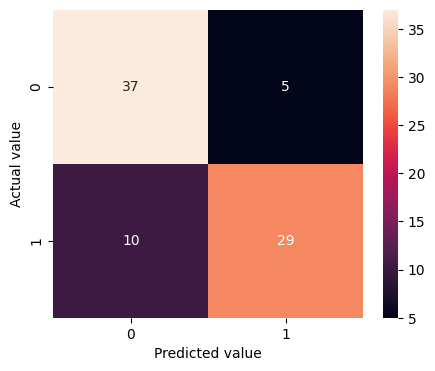

In [11]:
#2e
import pandas as pd
data=pd.read_csv("HeartDisease.csv")
X =data.iloc[:,[1,2,3,4,5,6,7,8,9,10,11,12]].values
y =data.iloc[:,13].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred=rfc.predict(X_test)
from sklearn import metrics
print("Classification Accuracy:", metrics.accuracy_score(y_test, y_pred)*100)
cm=metrics.confusion_matrix(y_test,y_pred)
print(cm)
import seaborn as sn
from matplotlib import pyplot as plt
plt.figure(figsize=(5,4))
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted value')
plt.ylabel('Actual value')
plt.show()


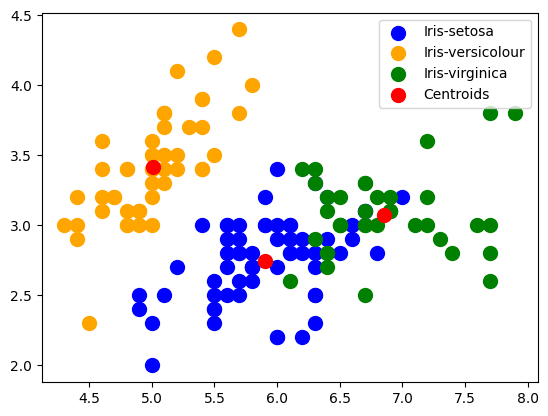

In [13]:
#3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
iris = pd.read_csv("iris.csv")
x = iris.iloc[:, [ 1,2,3,4]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)


kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'blue', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')

plt.legend()

plt.show()


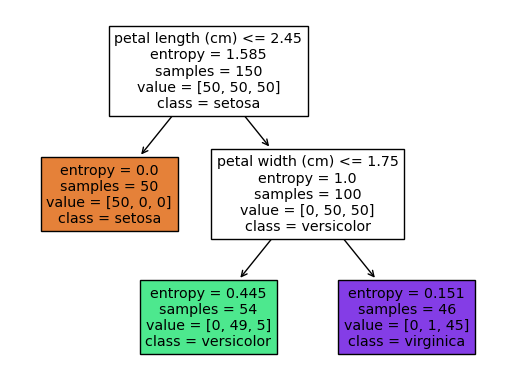

In [24]:
#2d
from sklearn.datasets import load_iris
iris=load_iris()
from sklearn.tree import DecisionTreeClassifier as ds
x3=iris.data
y3=iris.target
model=ds(criterion="entropy", max_depth=2)
model.fit(x3,y3)
from sklearn import tree
_=tree.plot_tree(model, feature_names=iris.feature_names,class_names=iris.target_names,filled=True)

In [1]:
#5
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

nltk.download('punkt')
nltk.download('stopwords')

def preprocess_text(text):
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    filtered_words = [word.lower() for word in word_tokens if word.isalpha() and word.lower() not in stop_words]
    return filtered_words

def create_bow_model(texts):
    all_words = []
    for text in texts:
        words = preprocess_text(text)
        all_words.extend(words)

    word_freq = FreqDist(all_words)
    bow_model = {word: freq for word, freq in word_freq.items()}
    return bow_model

# Example usage
texts = [
    "The cat sat on the mat, and the mat was comfortable.",
    "She sang a sweet song, a song that touched everyone's heart.",
    "Coding coding can be challenging, but coding is also incredibly rewarding.",
]

bow_model = create_bow_model(texts)

# Print the Bag of Words model
print("Bag of Words Model:")
for word, freq in bow_model.items():
    print(f"{word}: {freq}")


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\itadmin.SCASA1\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\itadmin.SCASA1\AppData\Roaming\nltk_data...


Bag of Words Model:
cat: 1
sat: 1
mat: 2
comfortable: 1
sang: 1
sweet: 1
song: 2
touched: 1
everyone: 1
heart: 1
coding: 3
challenging: 1
also: 1
incredibly: 1
rewarding: 1


[nltk_data]   Unzipping corpora\stopwords.zip.


In [2]:
#4
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
sentence="Hello Anu Barathi, You have to build a very good site and I love visiting your site."
words = word_tokenize(sentence)
ps = PorterStemmer()
for w in words:
    rootWord=ps.stem(w)
    print(rootWord)

hello
anu
barathi
,
you
have
to
build
a
veri
good
site
and
i
love
visit
your
site
.


In [14]:
from nltk.tokenize import word_tokenize
text = "God is Great! I won a lottery."
print(word_tokenize(text))

['God', 'is', 'Great', '!', 'I', 'won', 'a', 'lottery', '.']


In [13]:
from nltk.tokenize import sent_tokenize
text = "God is Great! I won a lottery."
print(sent_tokenize(text))

['God is Great!', 'I won a lottery.']


In [11]:
from nltk.stem import PorterStemmer
e_words= ["wait", "waiting", "waited", "waits"]
ps =PorterStemmer()
for w in e_words:
rootWord=ps.stem(w)
print(rootWord)

wait
wait
wait
wait


In [5]:
# stemming
#4
import nltk
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
text = "studies studying cries cry"
tokenization = nltk.word_tokenize(text)
for w in tokenization:
    print("Lemma for {} is {}".format(w, wordnet_lemmatizer.lemmatize(w)))

Lemma for studies is study
Lemma for studying is studying
Lemma for cries is cry
Lemma for cry is cry


In [6]:
#Limitization
# 4
from nltk.corpus import wordnet as wn
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import word_tokenize, pos_tag
from collections import defaultdict
tag_map = defaultdict(lambda : wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV
text = "SIST is a totally new kind of learning experience."
tokens = word_tokenize(text)
lemma_function = WordNetLemmatizer()
for token, tag in pos_tag(tokens):
    lemma = lemma_function.lemmatize(token, tag_map[tag[0]])
    print(token, "=>", lemma)

SIST => SIST
is => be
a => a
totally => totally
new => new
kind => kind
of => of
learning => learn
experience => experience
. => .


In [10]:
#6
import csv
import re

def identify_patterns(csv_file_path, column_name):
    patterns = {}

    with open(csv_file_path, 'r') as csvfile:
        reader = csv.DictReader(csvfile)

        for row in reader:
            text = row[column_name]

            
            pattern_matches = re.findall(r'Female', text, flags=re.IGNORECASE)

            # Update patterns dictionary with matches
            for match in pattern_matches:
                if match in patterns:
                    patterns[match] += 1
                else:
                    patterns[match] = 1

    return patterns
csv_file_path = 'Social_Network_Ads.csv' 
column_name = 'Gender'     
result = identify_patterns(csv_file_path, column_name)


for pattern, count in result.items():
    print(f"Pattern: {pattern}, Count: {count}")


Pattern: Female, Count: 204
